In [1]:
from typing import Tuple, List
from collections import OrderedDict
from copy import deepcopy
import matplotlib.pyplot as plt
from operator import itemgetter

In [2]:
# parse input
def make_criterias(A: List[int]) -> (List[int], List[int]):
    Q1 = []
    Q2 = []
    for i in A:
        assert(i < 100)
        Q1.append(i//10)
        Q2.append(i%10)
    return (Q1, Q2)

In [ ]:
A = [79, 95, 4, 37, 92, 95, 12, 52, 70, 14]
N = len(A)

In [ ]:
# Row 1
A = [53, 66, 97, 48, 47, 72, 16, 86, 12, 59, 77, 51, 53, 97, 32, 3, 35, 51, 7, 98]
N = len(A)

In [ ]:
# Row 2
A = [49, 54, 61, 6, 34, 3, 25, 84, 28, 97, 63, 33, 15, 60, 81, 14, 85, 97, 51, 97]
N = len(A)

In [3]:
# Row 3
A = [8, 29, 49, 13, 79, 34, 16, 14, 85, 75, 65, 86, 30, 26, 92, 16, 29, 69, 52, 9]
N = len(A)

In [ ]:
# Rows 1-3
A = [53, 66, 97, 48, 47, 72, 16, 86, 12, 59, 77, 51, 53, 97, 32, 3, 35, 51, 7, 98, 
     49, 54, 61, 6, 34, 3, 25, 84, 28, 97, 63, 33, 15, 60, 81, 14, 85, 97, 51, 97,
     8, 29, 49, 13, 79, 34, 16, 14, 85, 75, 65, 86, 30, 26, 92, 16, 29, 69, 52, 9]
N = len(A)

In [4]:
Q1, Q2 = make_criterias(A)
assert(len(Q1) == len(Q2) == N)
print(" Alternatives ".center(len(Q1)*3, "#"))
print(f"Q1 = {Q1}")
print(f"Q2 = {Q2}")

####################### Alternatives #######################
Q1 = [0, 2, 4, 1, 7, 3, 1, 1, 8, 7, 6, 8, 3, 2, 9, 1, 2, 6, 5, 0]
Q2 = [8, 9, 9, 3, 9, 4, 6, 4, 5, 5, 5, 6, 0, 6, 2, 6, 9, 9, 2, 9]


In [5]:
# Create all criterias pairs(in this case)
X = OrderedDict()

for i in range(N):
    # check if criteria exist
    v = X.get((Q1[i], Q2[i]))
    if v:
        v["idx"].append(i) # just add id to list
    else:
        X[(Q1[i], Q2[i])] = {"idx": [i], "remove": False}
print(X)

OrderedDict([((0, 8), {'idx': [0], 'remove': False}), ((2, 9), {'idx': [1, 16], 'remove': False}), ((4, 9), {'idx': [2], 'remove': False}), ((1, 3), {'idx': [3], 'remove': False}), ((7, 9), {'idx': [4], 'remove': False}), ((3, 4), {'idx': [5], 'remove': False}), ((1, 6), {'idx': [6, 15], 'remove': False}), ((1, 4), {'idx': [7], 'remove': False}), ((8, 5), {'idx': [8], 'remove': False}), ((7, 5), {'idx': [9], 'remove': False}), ((6, 5), {'idx': [10], 'remove': False}), ((8, 6), {'idx': [11], 'remove': False}), ((3, 0), {'idx': [12], 'remove': False}), ((2, 6), {'idx': [13], 'remove': False}), ((9, 2), {'idx': [14], 'remove': False}), ((6, 9), {'idx': [17], 'remove': False}), ((5, 2), {'idx': [18], 'remove': False}), ((0, 9), {'idx': [19], 'remove': False})])


In [6]:
def optimal_by_pareto(x: OrderedDict, released=False, details=False) -> OrderedDict:
    X = deepcopy(x)
    keys = list(X.keys())
    N = len(X)
    if N < 1:
        return X
    
    def check_pareto(crit1, crit2):
        # if all c1 is >= then c2, remove c2
        if X[keys[crit1]]["remove"] or X[keys[crit2]]["remove"]:
            return False
        remove = True
        for c1, c2 in  zip(keys[crit1], keys[crit2]):
            if c2 > c1 or (released and c2 == c1):
                remove = False
                break
        
        if remove:
            X[keys[crit2]]["removed_by"] = min(X[keys[crit1]]["idx"])
        # remove items while iterating is bad, so just mark them
        X[keys[crit2]]["remove"] = remove
        return remove    
    
    i = 0
    j = 1
    while i < N-1:
        while j < N:
            if check_pareto(i, j) or not check_pareto(j, i):
                j += 1
                continue
            break

        i += 1
        j = i + 1

    # form final optimal set
    P = set()
    for k,v in X.items():
        if not v["remove"]:
            P.add(k)

    # show by which element it was kicked off
    if details:
        to_exl = {}
        for k,v in X.items():
            r_by = v.get("removed_by")
            if r_by is None:
                r_by = " "
            for i in v["idx"]:
                to_exl[i] = str(r_by)
        print(", ".join([to_exl[k] for k in sorted(to_exl.keys())]))
    return P

In [7]:
optimal_by_pareto(X, details=True)

1, 2, 4, 2,  , 4, 4, 4, 11, 4, 4,  , 4, 4,  , 4, 2, 4, 4, 4


{(7, 9), (8, 6), (9, 2)}

In [8]:
optimal_by_pareto(X, True, details=True)

1,  ,  , 1,  , 2, 1, 1,  , 11, 4,  , 2, 2,  , 1,  ,  , 4,  


{(0, 9), (2, 9), (4, 9), (6, 9), (7, 9), (8, 5), (8, 6), (9, 2)}

In [9]:
def draw_plot(pairs, optimal):
    plt.figure(figsize=(10,10))
    plt.rcParams.update({'font.size': 11})
    for (x,y), v in pairs.items():
        plt.plot(x, y, 'ko')
        lable = ""
        for i in v["idx"]:
            lable += f"A{i}="
        lable = lable[:-1] # remove last '='

        plt.annotate(lable, (x,y),
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='left')

    plt.xlabel("Q1")
    plt.ylabel("Q2")
    # TODO: not shure sort is fine
    plt.plot(*zip(*sorted(optimal, key=lambda x: (x[0], -x[1]), reverse=True)))
    plt.grid(True)
    plt.xticks(range(max(pairs.keys(), key = itemgetter(0))[0]+3))
    plt.yticks(range(max(pairs.keys(), key = itemgetter(1))[1]+3))
    plt.show()

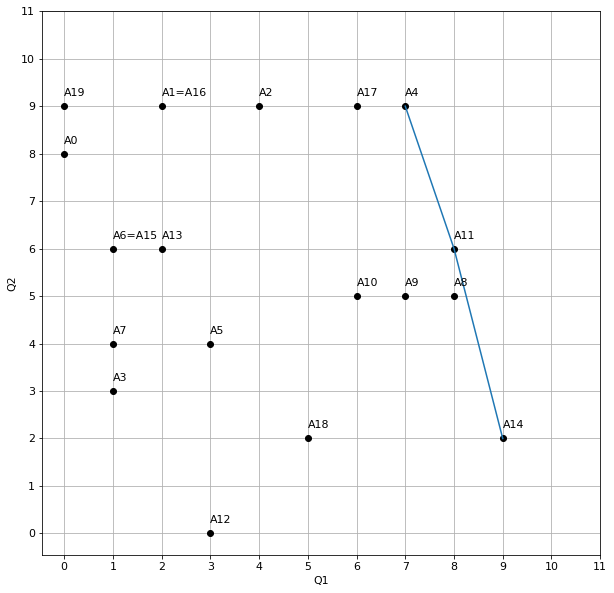

In [10]:
draw_plot(X, optimal_by_pareto(X))

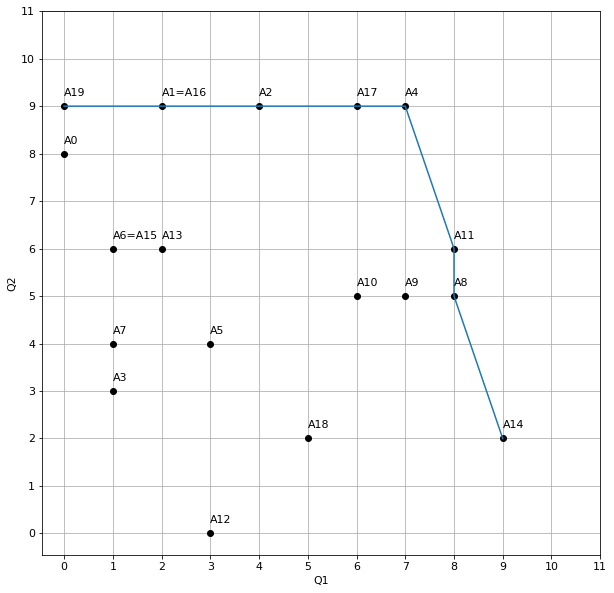

In [11]:
draw_plot(X, optimal_by_pareto(X, True))